<a href="https://colab.research.google.com/github/BrotherKim/Colab/blob/main/SEP592/BK_inceptionv3_Breast_classification_0616.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['ROOTDIR'] = "/content/jt_breast_aug"

In [ ]:
!mkdir -p $ROOTDIR
!unzip /content/gdrive/MyDrive/breast_aug.zip -d $ROOTDIR

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/jt_breast_aug/TIL/train___TIL__TCGA-05-4417-01Z-00-DX1_azhao__2090_1_2.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_1__292_2_1.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_5__2524_1_2.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_1__593_2.png  
  inflating: /content/jt_breast_aug/TIL/test___TIL__TCGA-05-4396-01Z-00-DX1_azhao__580_2_1.png  
  inflating: /content/jt_breast_aug/TIL/test___TIL__luad_batch_1__645_2_2.png  
  inflating: /content/jt_breast_aug/TIL/test___TIL__TCGA-A2-A04Y-01Z-00-DX1_agreement__119_1_3.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__TCGA-A2-A04P-01Z-00-DX1_agreement__181_2.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_1__1561_2.png  
  inflating: /content/jt_breast_aug/TIL/valid___TIL__TCGA-A2-A04Y-01Z-00-DX1_agreement__18_2_1.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_

In [ ]:
!ls -1 $ROOTDIR

Normal
TIL


In [ ]:
!mkdir -p $ROOTDIR/train_set/
!mkdir -p $ROOTDIR/test_set/TIL
!mkdir -p $ROOTDIR/test_set/Normal
!mkdir -p $ROOTDIR/valid_set/TIL
!mkdir -p $ROOTDIR/valid_set/Normal

In [ ]:
!cd $ROOTDIR/TIL && ls -1 | wc -l

48712


In [ ]:
!cd $ROOTDIR/TIL && ls -1 | head -4800 | xargs -i mv "{}" $ROOTDIR/test_set/TIL

In [ ]:
!cd $ROOTDIR/TIL && ls -1 | head -4800 | xargs -i mv "{}" $ROOTDIR/valid_set/TIL

In [ ]:
!cd $ROOTDIR/TIL && ls -1 | wc -l

39112


In [ ]:
!mv $ROOTDIR/TIL $ROOTDIR/train_set/TIL

In [ ]:
!cd $ROOTDIR/Normal && ls -1 | wc -l

52888


In [ ]:
!cd $ROOTDIR/Normal && ls -1 | head -5280 | xargs -i mv "{}" $ROOTDIR/test_set/Normal

In [ ]:
!cd $ROOTDIR/Normal && ls -1 | head -5280 | xargs -i mv "{}" $ROOTDIR/valid_set/Normal

In [ ]:
!cd $ROOTDIR/Normal && ls -1 | wc -l

42328


In [ ]:
!mv $ROOTDIR/Normal $ROOTDIR/train_set/Normal

In [ ]:
!cd $ROOTDIR/train_set/TIL && ls -1 | wc -l
!cd $ROOTDIR/train_set/Normal && ls -1 | wc -l
!cd $ROOTDIR/test_set/TIL && ls -1 | wc -l
!cd $ROOTDIR/test_set/Normal && ls -1 | wc -l
!cd $ROOTDIR/valid_set/TIL && ls -1 | wc -l
!cd $ROOTDIR/valid_set/Normal && ls -1 | wc -l

39112
42328
4800
5280
4800
5280


# Dataset 형태
datasets<br>
    &emsp;&emsp;└── test_set<br>
    &emsp;&emsp;│   &emsp;&emsp;├── class1<br>
    &emsp;&emsp;│   &emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
    &emsp;&emsp;│   &emsp;&emsp;└── class2<br>
    &emsp;&emsp;│       &emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>
    &emsp;&emsp;└── training_set<br>
        &emsp;&emsp;&emsp;&emsp;├── class1<br>
        &emsp;&emsp;&emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
        &emsp;&emsp;&emsp;&emsp;└── class2<br>
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>


# Parameter 및 Basemodel 설정

In [ ]:
IMAGE_SIZE = 299
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
NUM_CLASSES = 2
WEIGHT_DIR_PATH = '/content/gdrive/MyDrive/KAIST/SEP592/checkpoints'
WEIGHT_FILE_PATH = '20210616_Inceptionv3_jt_brca.h5'

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

baseModel = InceptionV3(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseMode =ResNet50(include_top=True, weights=None, input_shape=INPUT_SHAPE, classes=NUM_CLASSES)

baseModel.summary()

87916544/87910968 [==============================] - 2s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

#rootPath = '/content/datasets'
#rootPath = '/content/gdrive/MyDrive/KAIST/SEP592/jt_breast_aug'
rootPath = os.environ['ROOTDIR']

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

In [ ]:
#!find /content/gdrive/MyDrive/KAIST/lym_augmentation -type f | wc -l

In [ ]:
#!cp -r /content/gdrive/MyDrive/KAIST/lym_aug1mentation/* /content/gdrive/MyDrive/KAIST/dataset_augmentation/train_set/lym/

In [ ]:
#!find /content/gdrive/MyDrive/KAIST/dataset_augmentation/train_set/lym -type f | wc -l

In [ ]:
#!cd /content/gdrive/MyDrive/KAIST/lym_aug1mentation/ && find ./ -name "*aug*" | sed -e 'p' -e "s/aug/aug1/g" |xargs -n 2 mv


In [ ]:
#!find /content/gdrive/MyDrive/KAIST/dataset_augmentation/train_set/normal -type f | wc -l

# Data Load

In [ ]:
trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE)
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join('/content/gdrive/MyDrive/KAIST/dataset', 'test_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE)
)

Found 81440 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.


# Model setting

In [ ]:
for i, l in enumerate(baseModel.layers):
  print(i, l.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [ ]:
from keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D, Dense, BatchNormalization

x = baseModel.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', input_dim=INPUT_SHAPE)(x)
x = BatchNormalization()(x)
x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(
    inputs=baseModel.input
    , outputs=x
    )

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 38,715,426
Trainable params: 38,679,458
Non-trainable params: 35,968
__________________________________________________________________________________________________


# Finetuning

In [ ]:
NUM_FREEZE = 250

for l in baseModel.layers:
  l.trainable = False

for l in baseModel.layers[NUM_FREEZE:]:
  l.trainable = True


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['acc'],
)

In [30]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
early_stop = EarlyStopping(patience=10,verbose=2,monitor='loss')

epochs = 32
history = model.fit_generator(
    trainGen,  
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=validationGen.samples / epochs,
    callbacks=[reduce_lr,early_stop],
    workers=1000,
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
2545/2545 [==============================] - 1728s 667ms/step - loss: 0.8551 - acc: 0.5147 - val_loss: 0.7008 - val_acc: 0.1902
Epoch 2/32
2545/2545 [==============================] - 1292s 508ms/step - loss: 0.6929 - acc: 0.5147 - val_loss: 0.7441 - val_acc: 0.1915
Epoch 3/32
2545/2545 [==============================] - 1336s 525ms/step - loss: 0.6927 - acc: 0.5190 - val_loss: 0.7323 - val_acc: 0.1892
Epoch 4/32
2545/2545 [==============================] - 1377s 541ms/step - loss: 0.6923 - acc: 0.5218 - val_loss: 0.7018 - val_acc: 0.1895
Epoch 5/32
2545/2545 [==============================] - 1423s 559ms/step - loss: 0.6925 - acc: 0.5209 - val_loss: 0.7271 - val_acc: 0.1918
Epoch 6/32
2545/2545 [==============================] - 1475s 580ms/step - loss: 0.6924 - acc: 0.5215 - val_loss: 0.7142 - val_acc: 0.1883
Epoch 7/32
2545/2545 [==============================] - 1531s 602ms/step - loss: 0.6925 - acc: 0.5185 - val_loss: 0.7270 - val_acc: 0.1946
Epoch 8/32
2545/2545 [=====

In [31]:
#model.save_weights("/content/gdrive/MyDrive/KAIST/SEP592/checkpoints/resnet50_brca_ckpt")
!mkdir -p WEIGHT_DIR_PATH
WEIGHT_FILE_PATH = '210616_Inceptionv3_brca_aug_freeze250.h5'

model.save_weights('%s/%s' % (WEIGHT_DIR_PATH, WEIGHT_FILE_PATH))

# `assert_consumed` can be used as validation that all variable values have been
# restored from the checkpoint. See `tf.train.Checkpoint.restore` for other
# methods in the Status object.
#load_status.assert_consumed()

#학습 결과 시각화

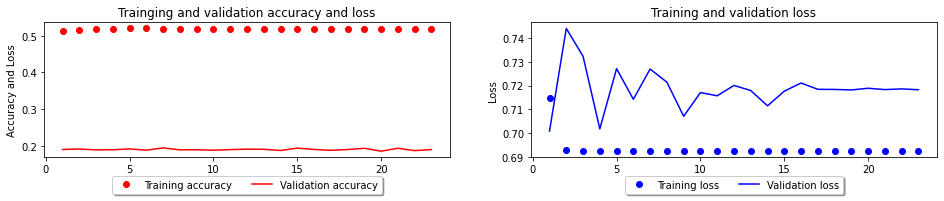

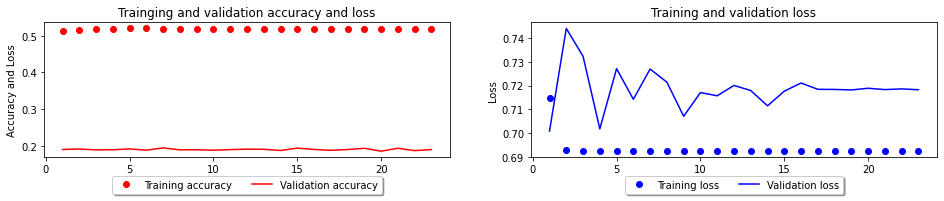

In [32]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()
show_graph(history.history)


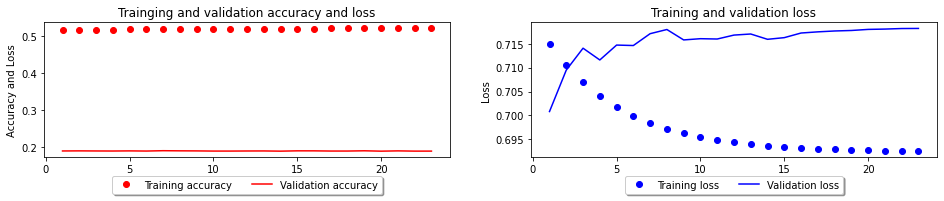

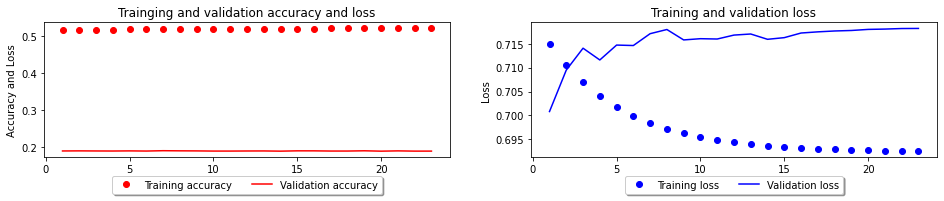

In [33]:
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)


#모델 평가

In [ ]:
#!ls -l /content/gdrive/MyDrive/KAIST/SEP592/checkpoints | grep resnet50 | grep brca

In [ ]:
#load_status = model.load_weights('%s/%s' % (WEIGHT_DIR_PATH, '210608_0741_resnet50_brca_12_300_300_aug.h5'))

In [ ]:
#model.compile(
#    optimizer='adam',
#    loss='binary_crossentropy', 
#    metrics=['acc'],
#)

In [37]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = testGenerator.flow_from_directory(
    os.path.join('/content/gdrive/MyDrive/KAIST/dataset', 'test_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle = False,  
)


Found 9600 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.


In [38]:
#model.evaluate_generator(testGen)
testevaluation = model.evaluate_generator(testGen, verbose=1, steps=testGen.samples//32, workers = 300)

300/300 [==============================] - 63s 206ms/step - loss: 0.7182 - acc: 0.1902


In [ ]:
testevaluation

In [ ]:
#Predicting the classes of images
testprediction = model.predict_generator(testGen, verbose=1, steps=testGen.samples//32)

In [ ]:
print(testGen.class_indices)
print(testprediction)

In [ ]:
testGen.classes

In [ ]:
testprediction[:,0]

In [ ]:
testprediction[:,1]

In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,0])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "normal"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,1])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "lym"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [47]:
len(testGen.labels)
#for i in range(100):

# answer가 0인데 predict가 1이면 failCntArr[0]++
failCntArr = [0, 0]
allCntArr = [0, 0]
for i in range(len(testprediction)):
  prdIdx = 1 if testprediction[i][0] < testprediction[i][1] else 0
  ansIdx = testGen.labels[i]
  allCntArr[ansIdx] += 1

  if prdIdx == ansIdx : continue
  #print('[FAIL] predict[%d], answer[%d]' % (prdIdx, ansIdx))
  failCntArr[ansIdx] += 1

print('Pass cnt : lym[%d/%d], normal[%d/%d]' % (failCntArr[0], allCntArr[0], failCntArr[1], allCntArr[1]))

Pass cnt : lym[0/1826], normal[7774/7774]
Pass cnt : lym[0/1826], normal[7774/7774]
